#Minimally parameterized Neural Networks

## Introduction

This is a pretty short notebook, because it has served more as an experimental platform using the same simple code with varying values.

I have used wandb to track my experiments and create logs

In [ ]:
# Import libraries
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

In [ ]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.4 MB/s eta 0:00:00


In [ ]:
!wandb login '30094bbd7602e459168a62207318aa76b72e33b5'

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb

In [ ]:
# Generate data
torch.manual_seed(32)
X = torch.unsqueeze(torch.arange(0, 1, 0.0025), dim=1)
noise = torch.randn(X.shape)
alpha = 0
y_train = torch.sin(8*np.pi*X)+alpha*noise
y_test = torch.sin(8*np.pi*X)

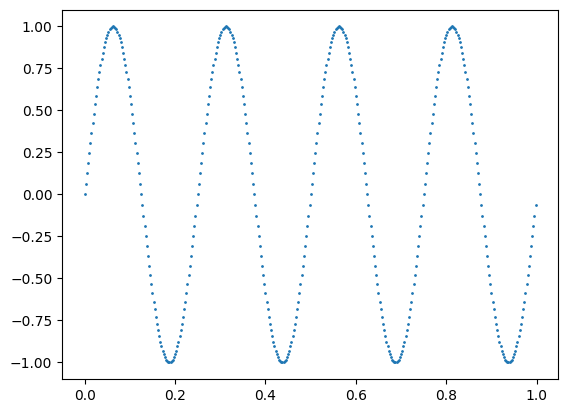

In [ ]:
# Plot data
plt.scatter(X.cpu(), y_train.cpu(),s=1)

In [ ]:
hidden_units = 100 # @param {type:"integer"}


In [ ]:
# Construct model
lr=0.01
EPOCHS = 50000
desired_loss = 0.00
activation = torch.nn.Sigmoid()


torch.manual_seed(2)
model100 = torch.nn.Sequential(
        torch.nn.Linear(in_features=1, out_features=hidden_units),
        activation,
        torch.nn.Linear(in_features=hidden_units, out_features=1),
    )

#torch.nn.init.uniform_(model[0].weight)
#torch.nn.init.uniform_(model[2].weight)
#torch.nn.init.uniform_(model[2].bias,a=0,b=1)
#torch.nn.init.uniform_(model[2].bias,a=0,b=1)
optimizer = torch.optim.Adam(model100.parameters(), lr=lr) # stochastic gradient descent
criterion = torch.nn.MSELoss() # mean-squared loss
run = wandb.init(
    # Set the project where this run will be logged
    project="8*sine_smaller",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": lr,
        "epochs": EPOCHS,
        "activation": activation,
        "hidden_layer_size": [hidden_units]
    },
)


for e in range(EPOCHS):
    # clear gradients
    optimizer.zero_grad()
    # propagate variable x through a network and get model's prediction
    y_predicted = model100(X)
    # compare predicted value with true value and calculate mean squared error
    loss = criterion(y_predicted, y_train)
    test_loss = criterion(y_predicted, y_test)
    # do backpropagation to compute gradients
    loss.backward()
    # optimize weights
    optimizer.step()
    # print statistics

    # log metrics to wandb
    #valid = criterion(y_predicted, torch.sin(X))
    #wandb.log({"loss": loss.item(), 'valid': valid.item()})
    wandb.log({"train": loss.item()})

# [optional] finish the wandb run, necessary in notebooks
    #wandb.finish()


train,██████▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▂▂▁▁
train,0.06548


In [ ]:
wandb.finish()

train,█████▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train,0.00083


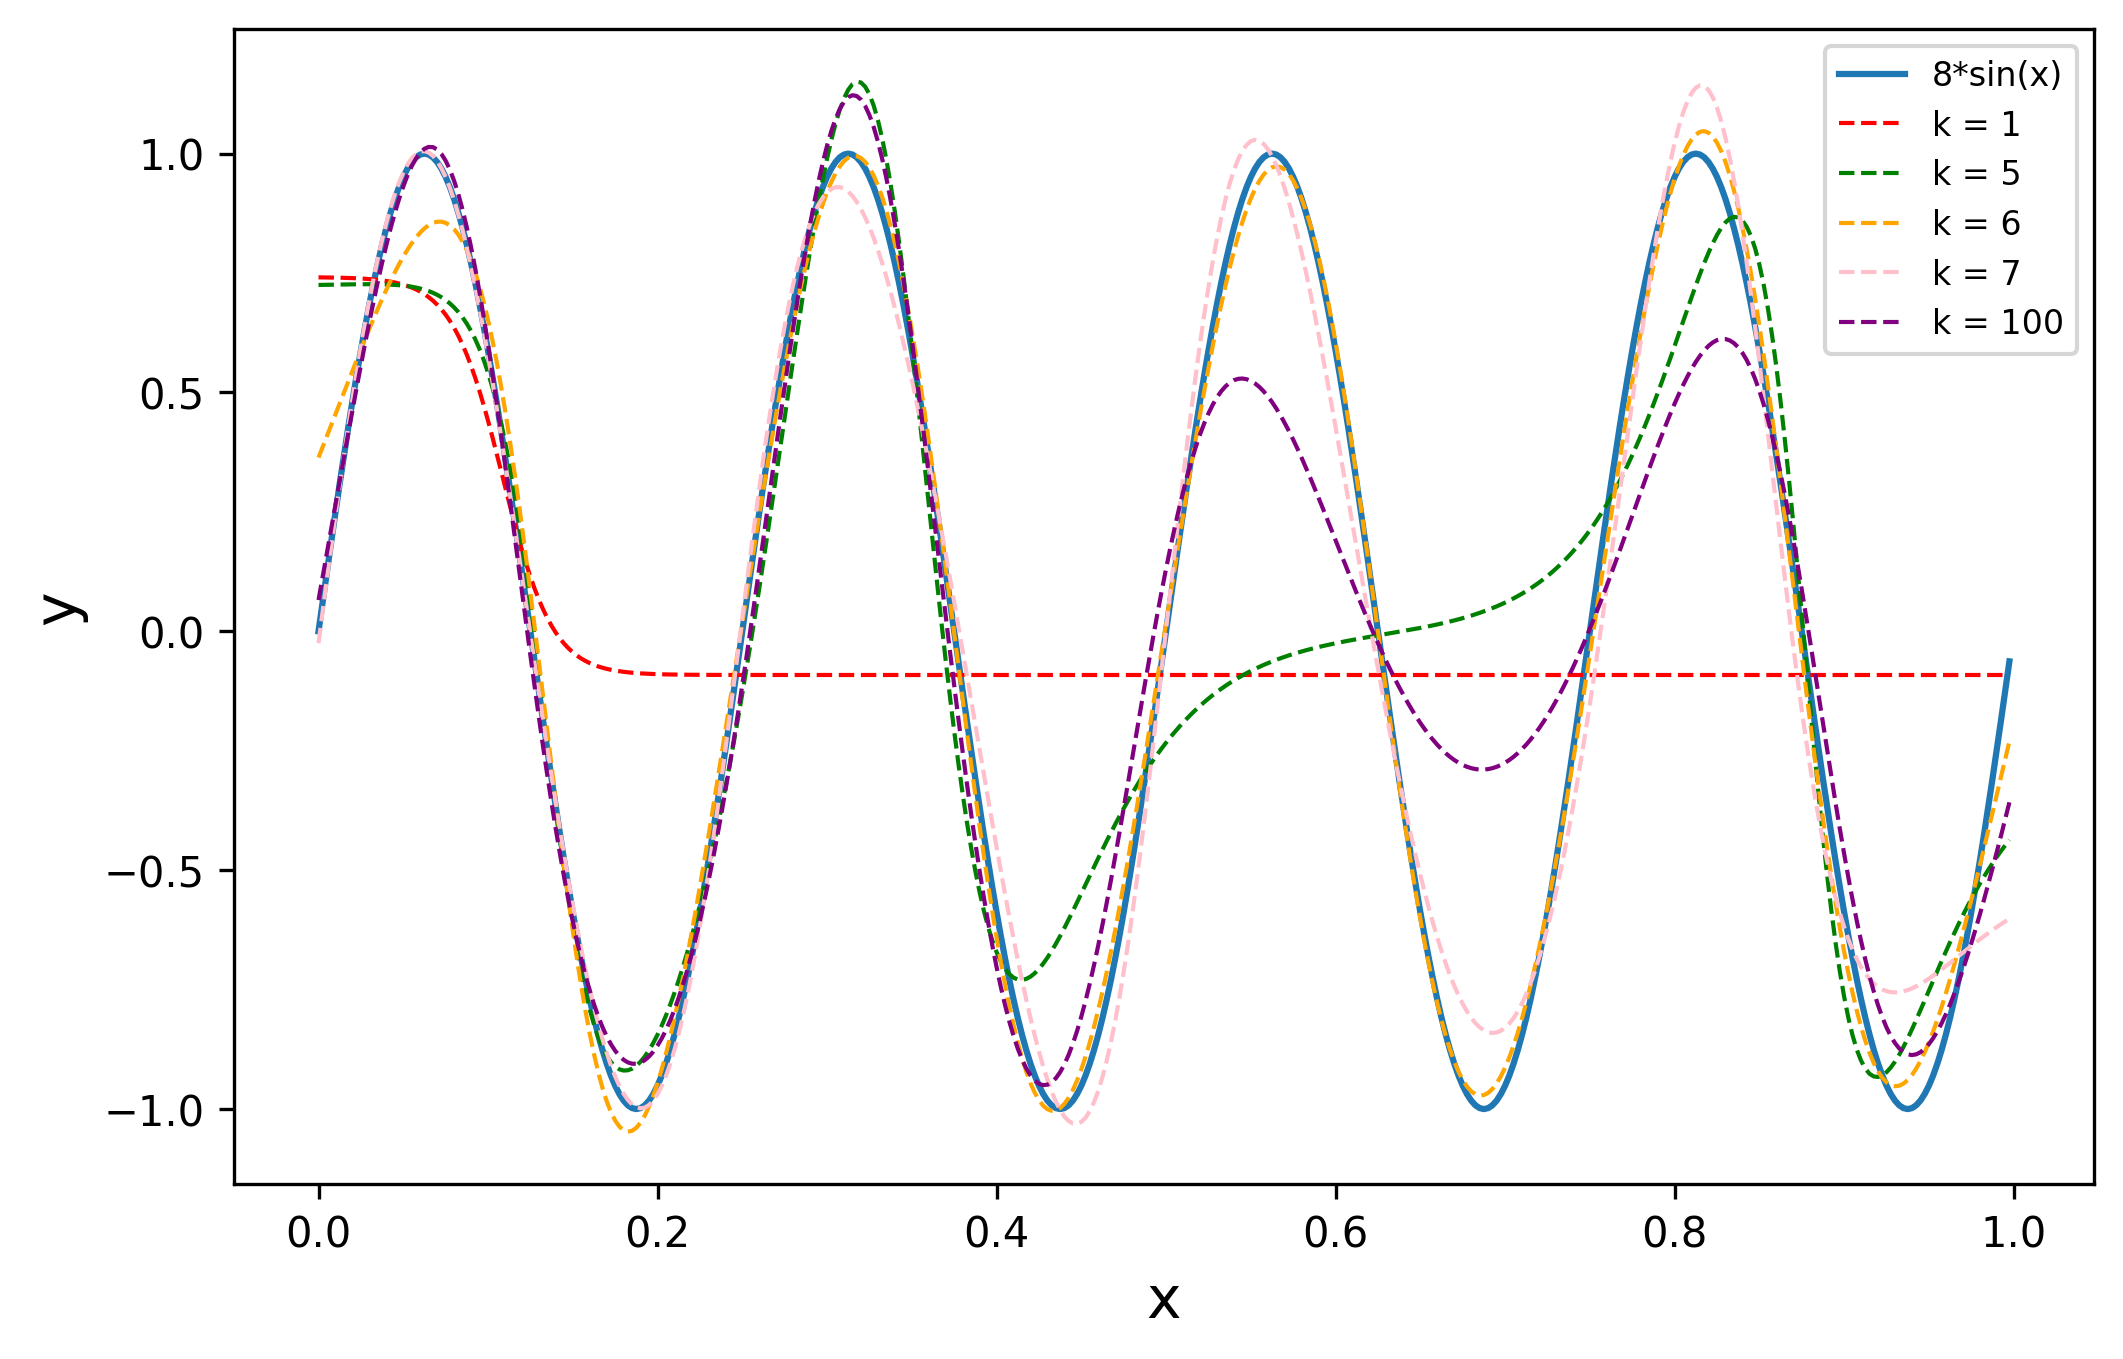

In [ ]:
x_to_plot = X.cpu().numpy()
y_to_plot = y_test.cpu().numpy()
y_predicted_to_plot = y_predicted.cpu().data.numpy()
_, ax = plt.subplots(1, 1, figsize=(8, 5),dpi=300)
ax.plot(x_to_plot, y_to_plot, label='8*sin(x)')
ax.plot(x_to_plot, model1(X).cpu().data.numpy(), c='red', linewidth=1, linestyle='--', label='k = 1')
ax.plot(x_to_plot, model5(X).cpu().data.numpy(), c='green', linewidth=1, linestyle='--', label='k = 5')
ax.plot(x_to_plot, model6(X).cpu().data.numpy(), c='orange', linewidth=1, linestyle='--', label='k = 6')
ax.plot(x_to_plot, model7(X).cpu().data.numpy(), c='pink', linewidth=1, linestyle='--', label='k = 7')
ax.plot(x_to_plot, model100(X).cpu().data.numpy(), c='purple', linewidth=1, linestyle='--', label='k = 100')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.legend(loc='best', fontsize=8)
plt.show()